# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../../assets/datasets/adult.sqlite') 
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

columns = c.execute("PRAGMA table_info(adult)").fetchall()
columns = [x[1] for x in columns]

df_demo = pd.DataFrame(c.execute("SELECT * FROM adult").fetchall(), columns = columns)

df_demo.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [2]:
#fill null to preserve data
print df_demo.isnull().any()

df_demo['workclass'] = df_demo['workclass'].fillna('Null')
df_demo['occupation'] = df_demo['occupation'].fillna('Null')
df_demo['native-country'] = df_demo['native-country'].fillna('Null')

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [4]:
df_demo['Target'] = df_demo['salary'].map({'<=50K': False, '>50K': True})
df_demo.Target.value_counts()

False    37155
True     11687
Name: Target, dtype: int64

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

Everyone


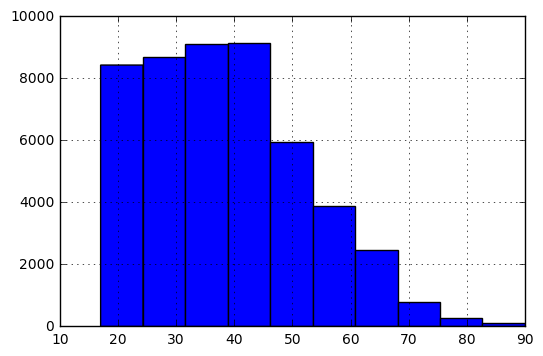

Greater than $50K


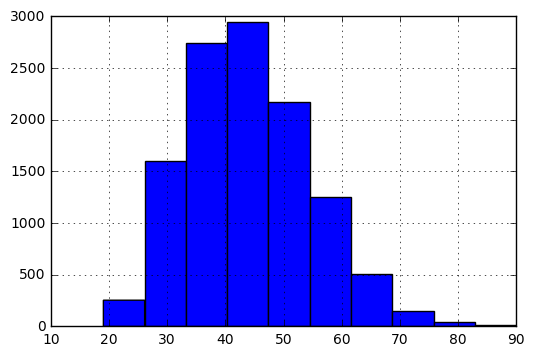

Less than $50K


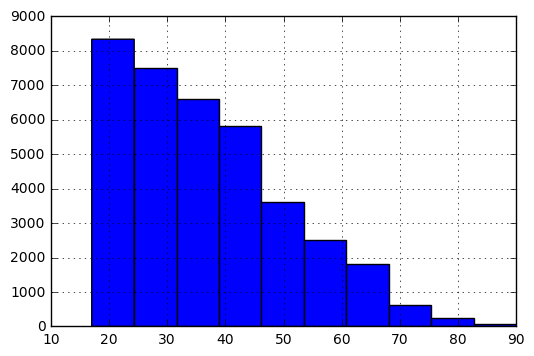

In [5]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline

print "Everyone"
df_demo['age'].hist()
plt.show()

print "Greater than $50K"
df_demo[df_demo.Target == True]['age'].hist()
plt.show()

print "Less than $50K"
df_demo[df_demo.Target == False]['age'].hist()
plt.show()

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

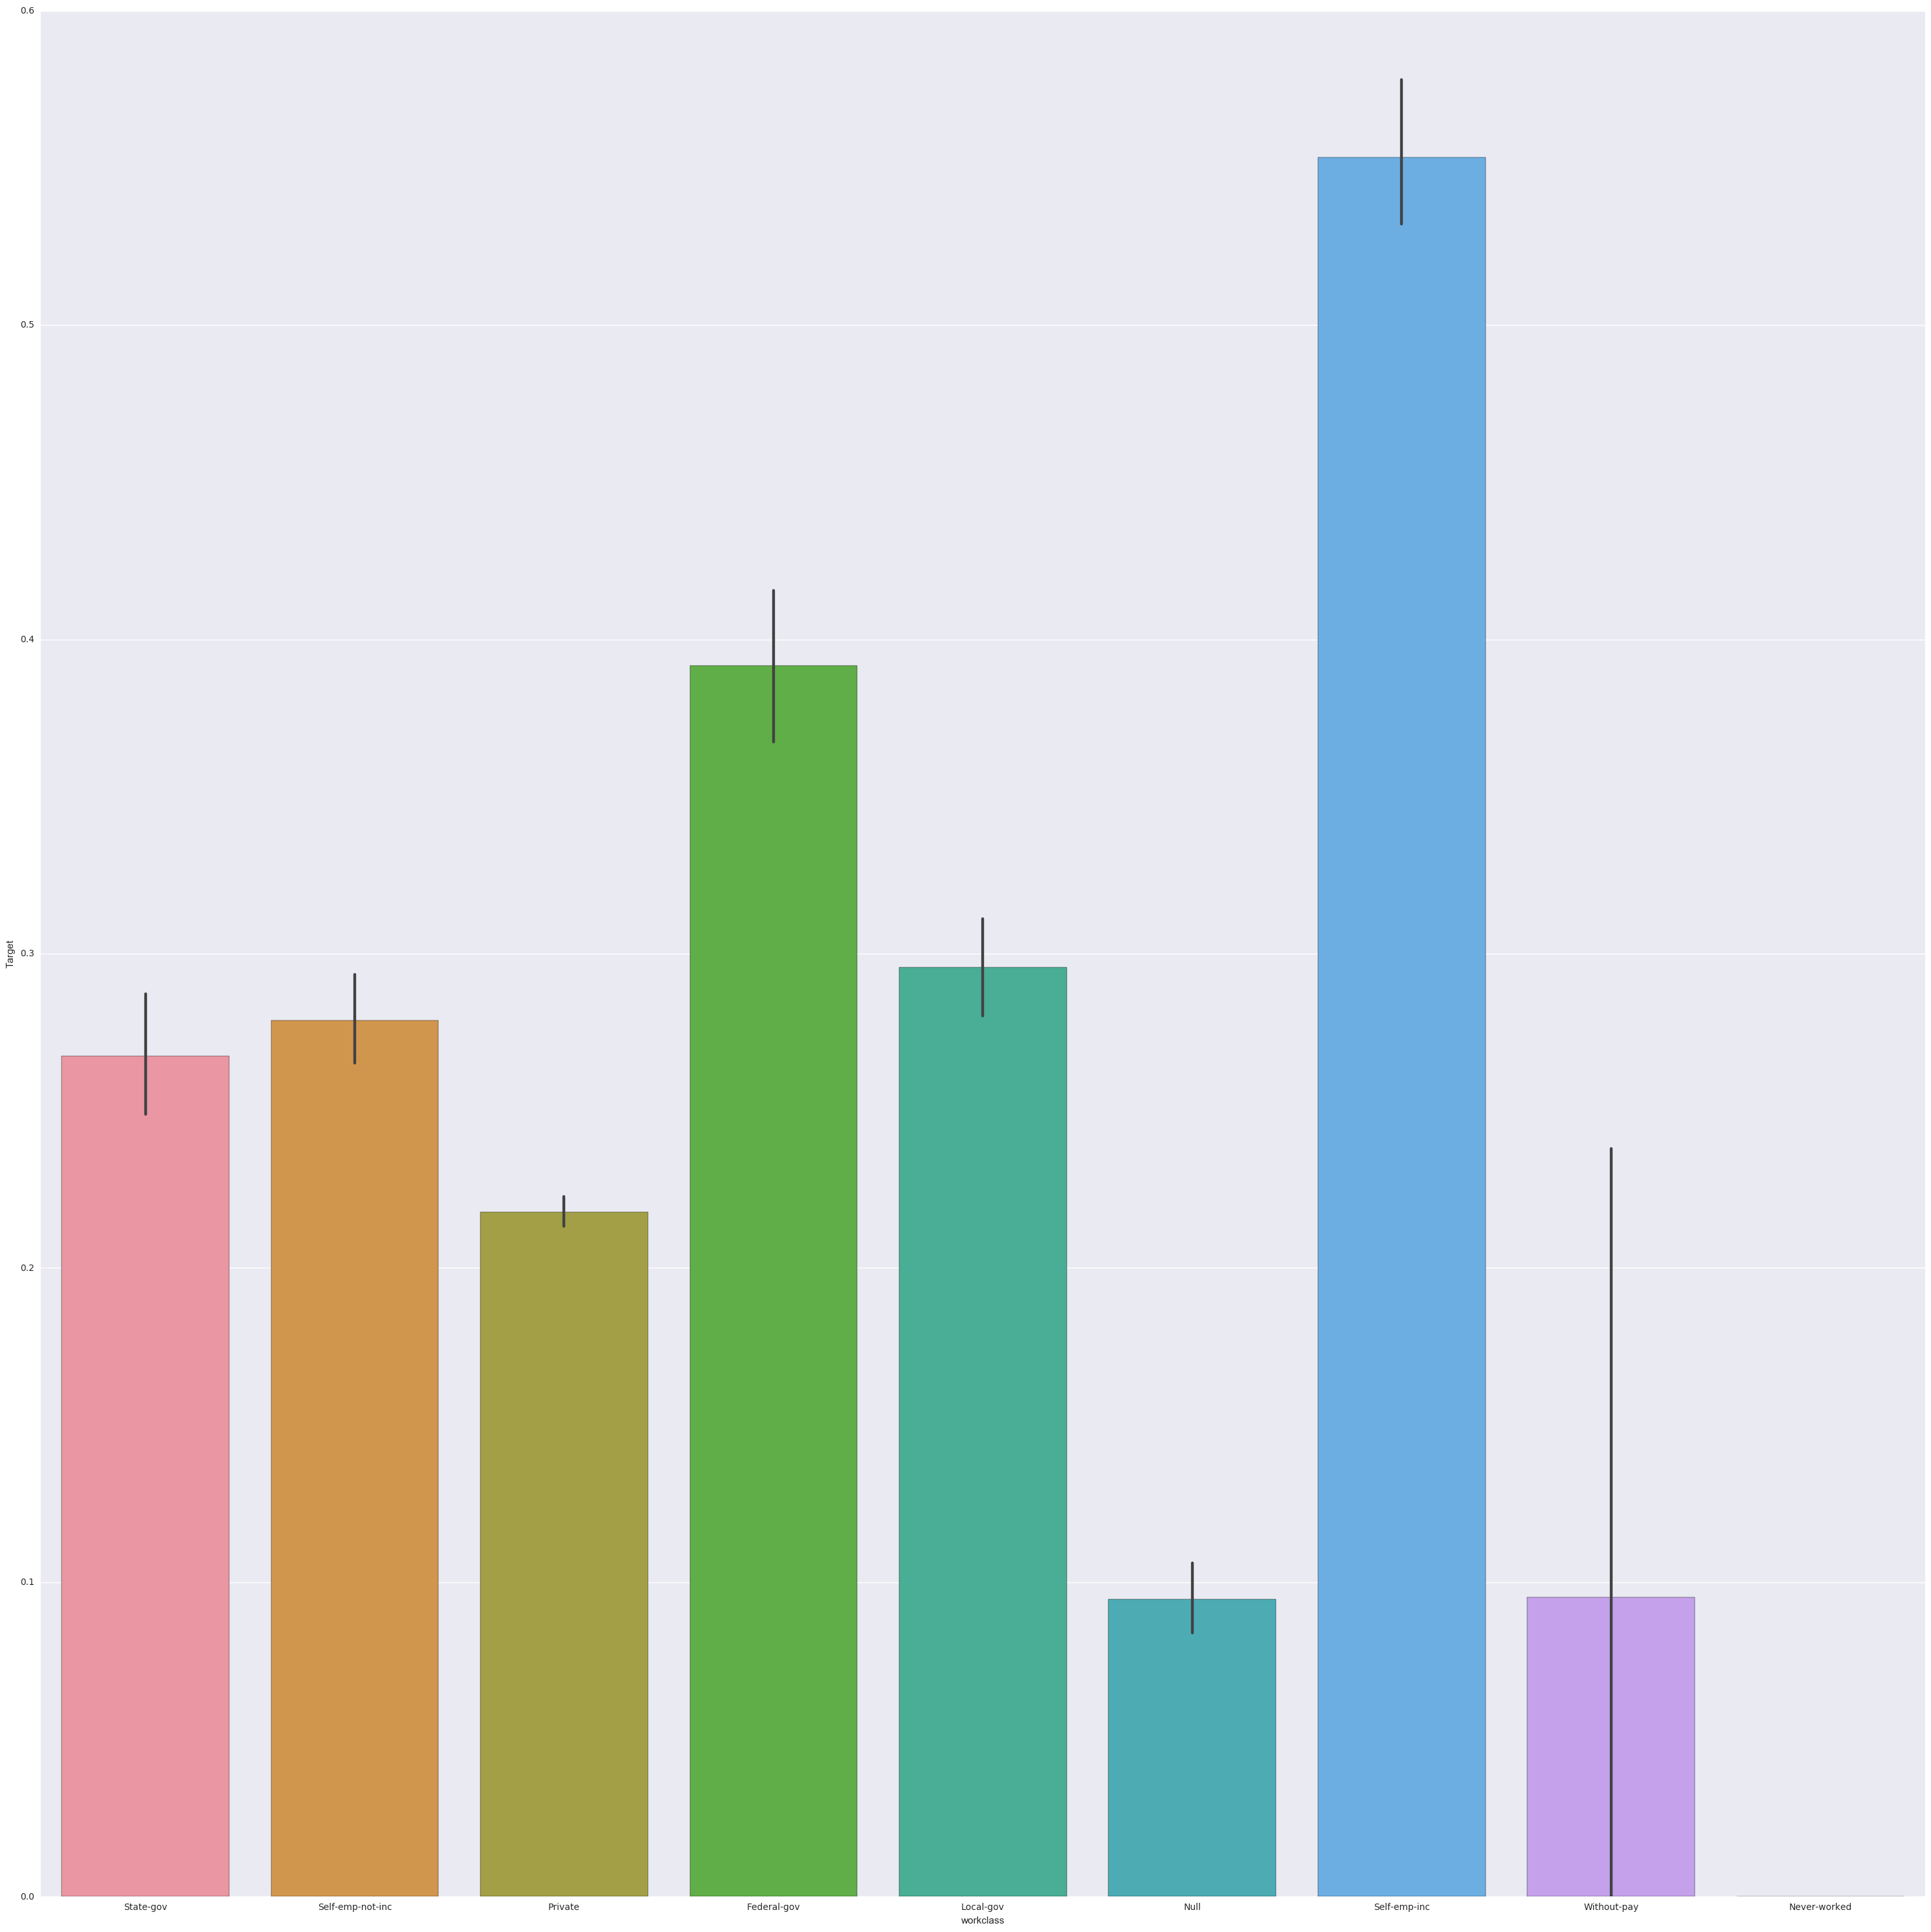

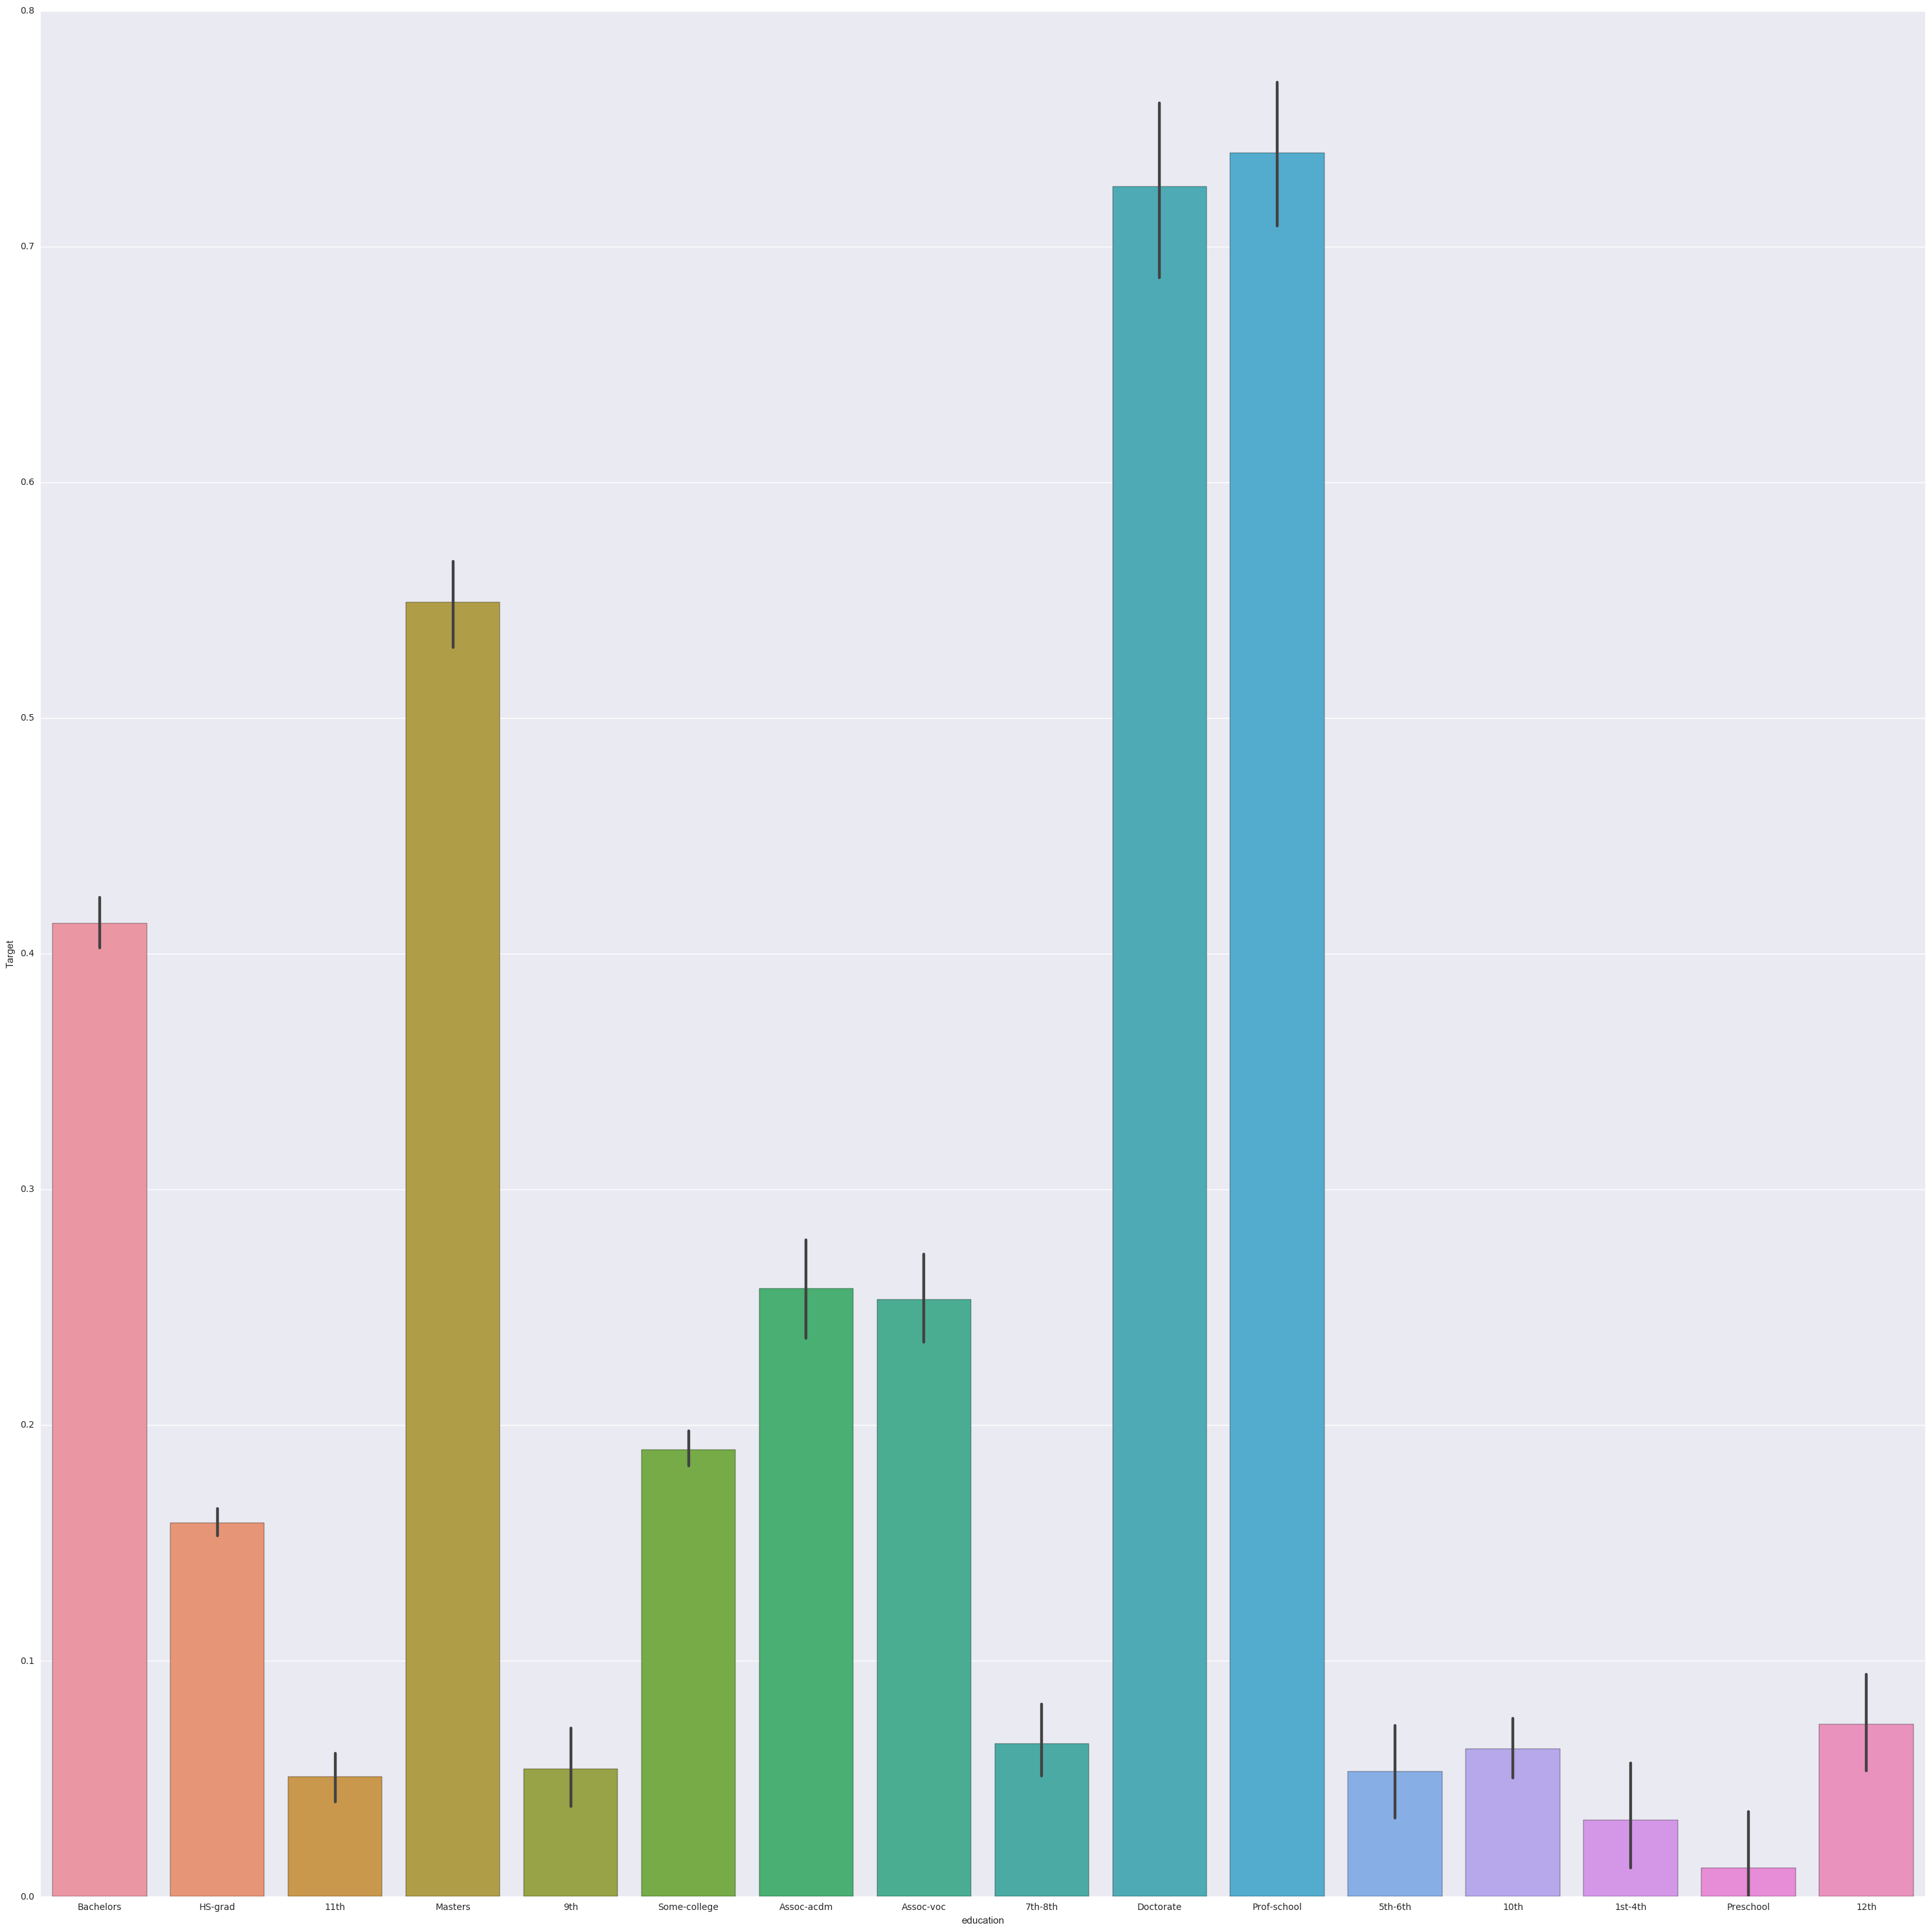

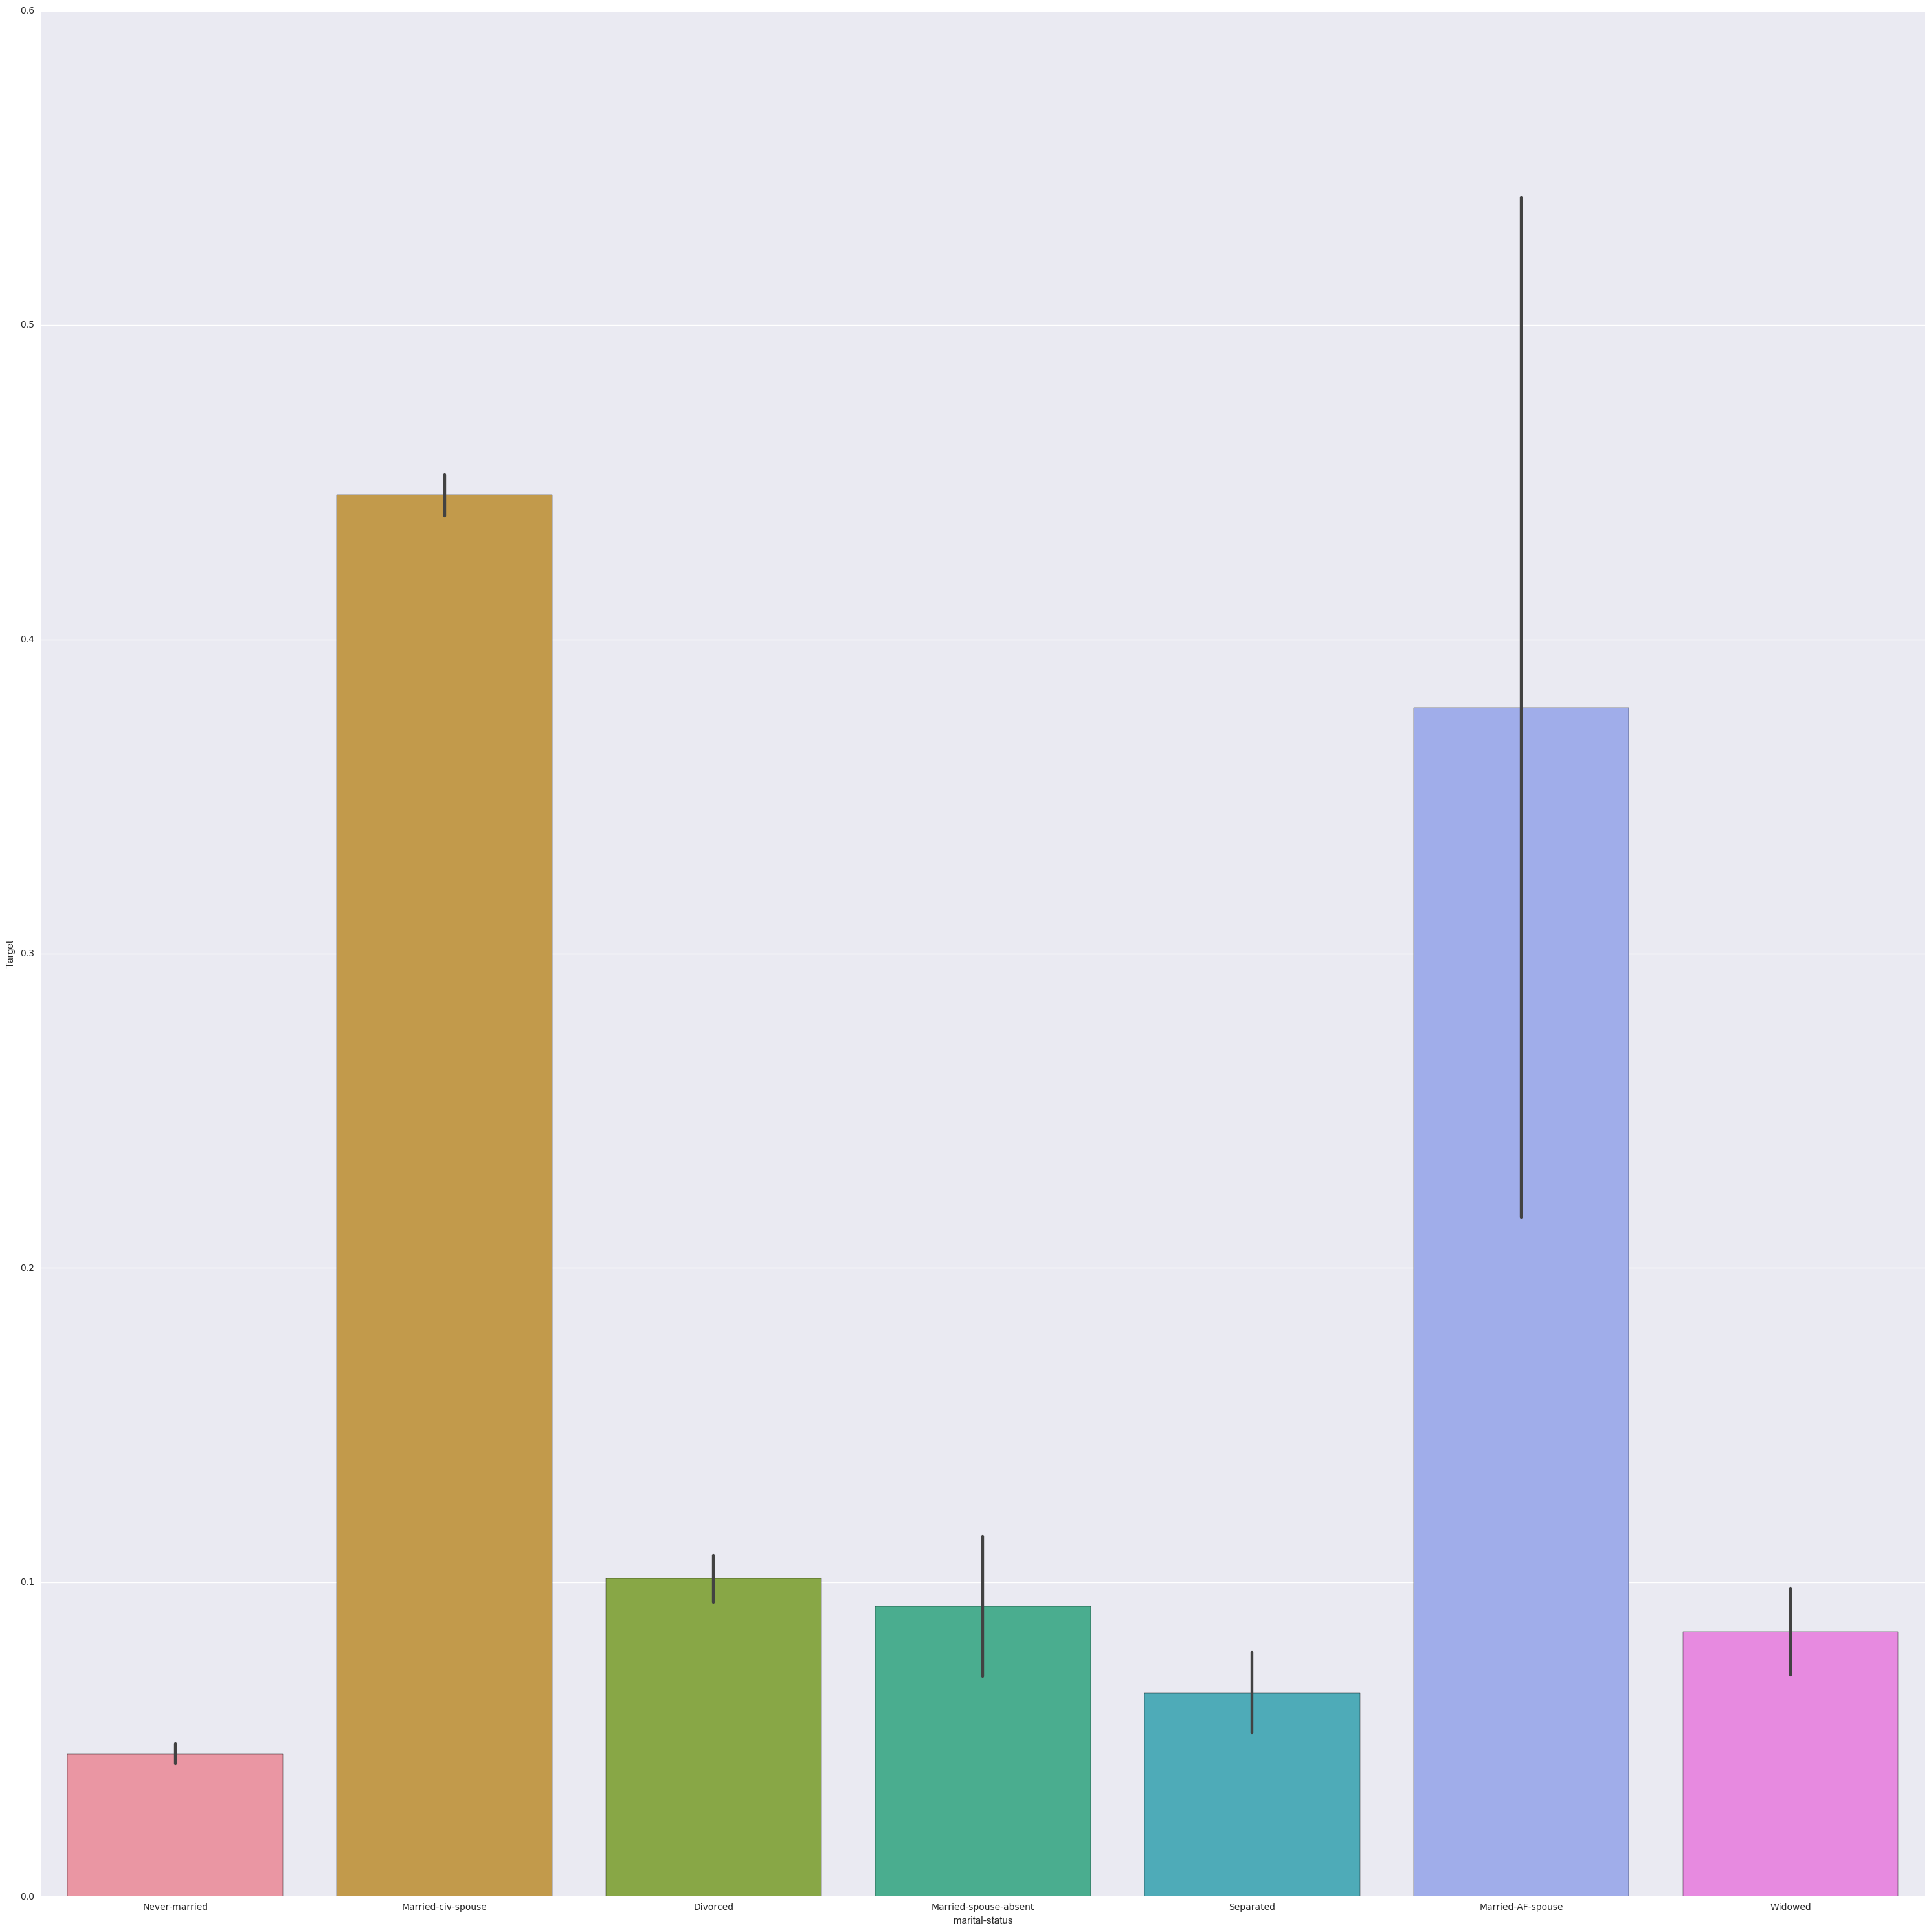

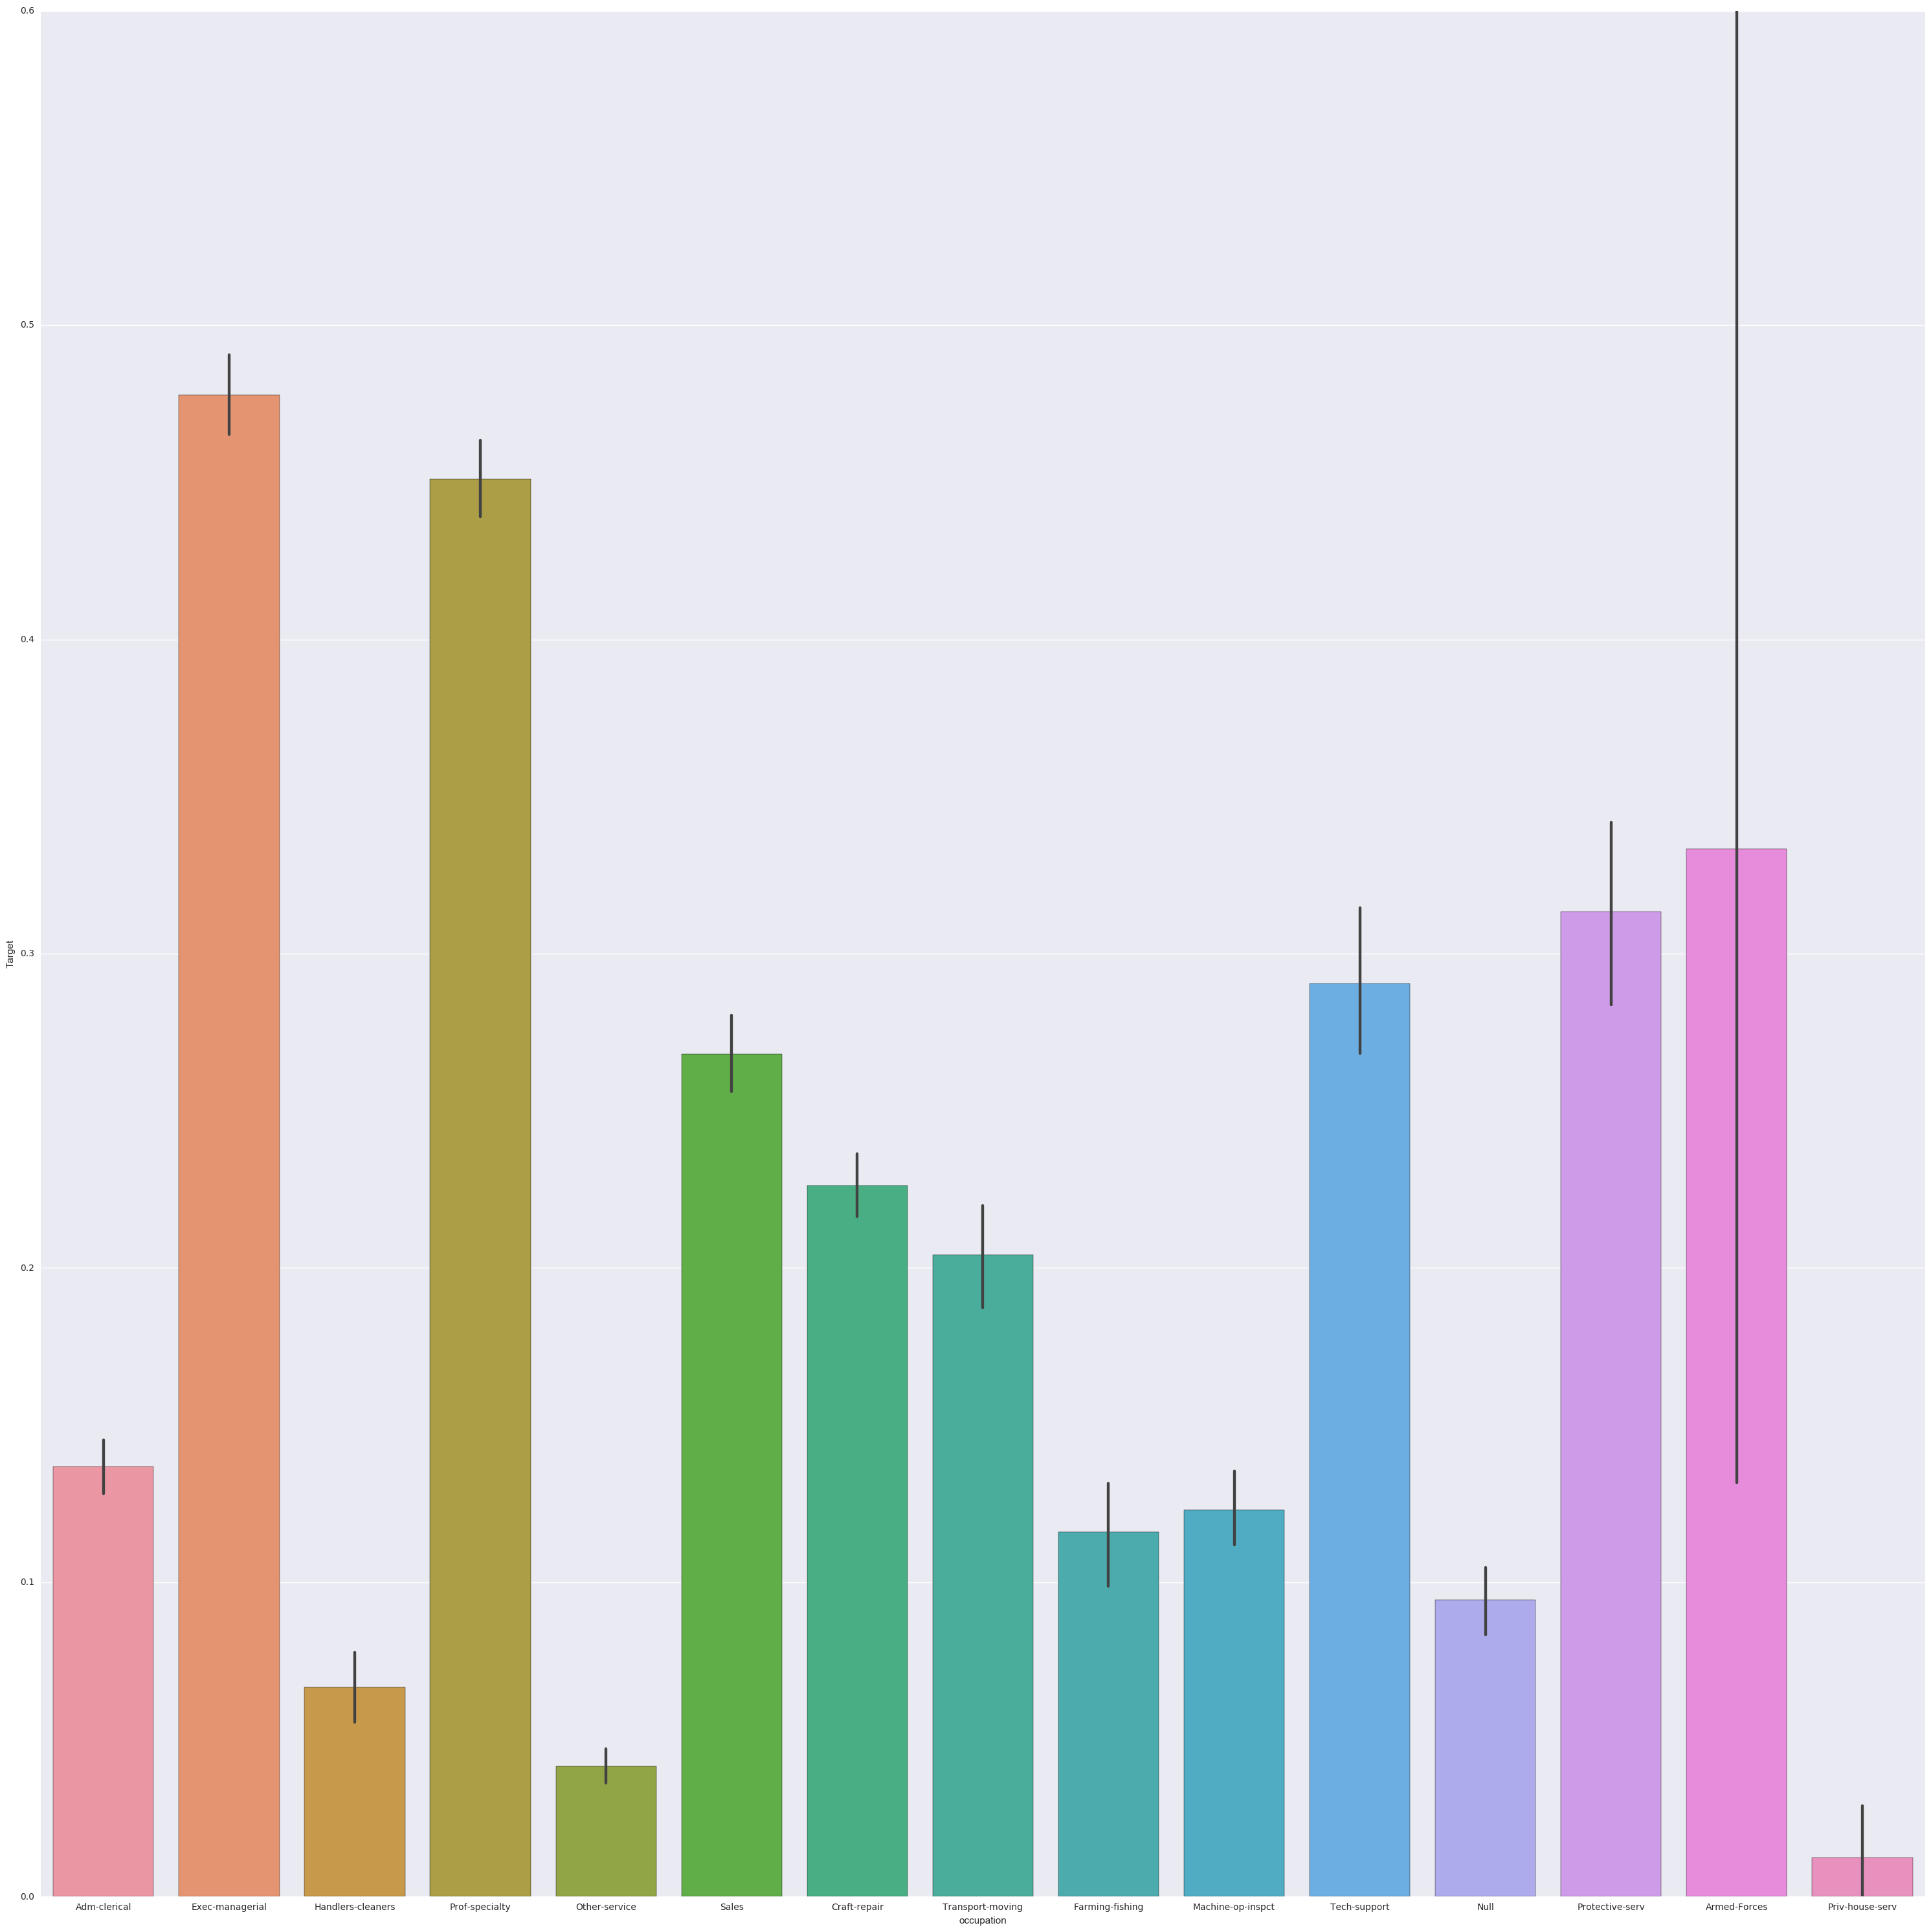

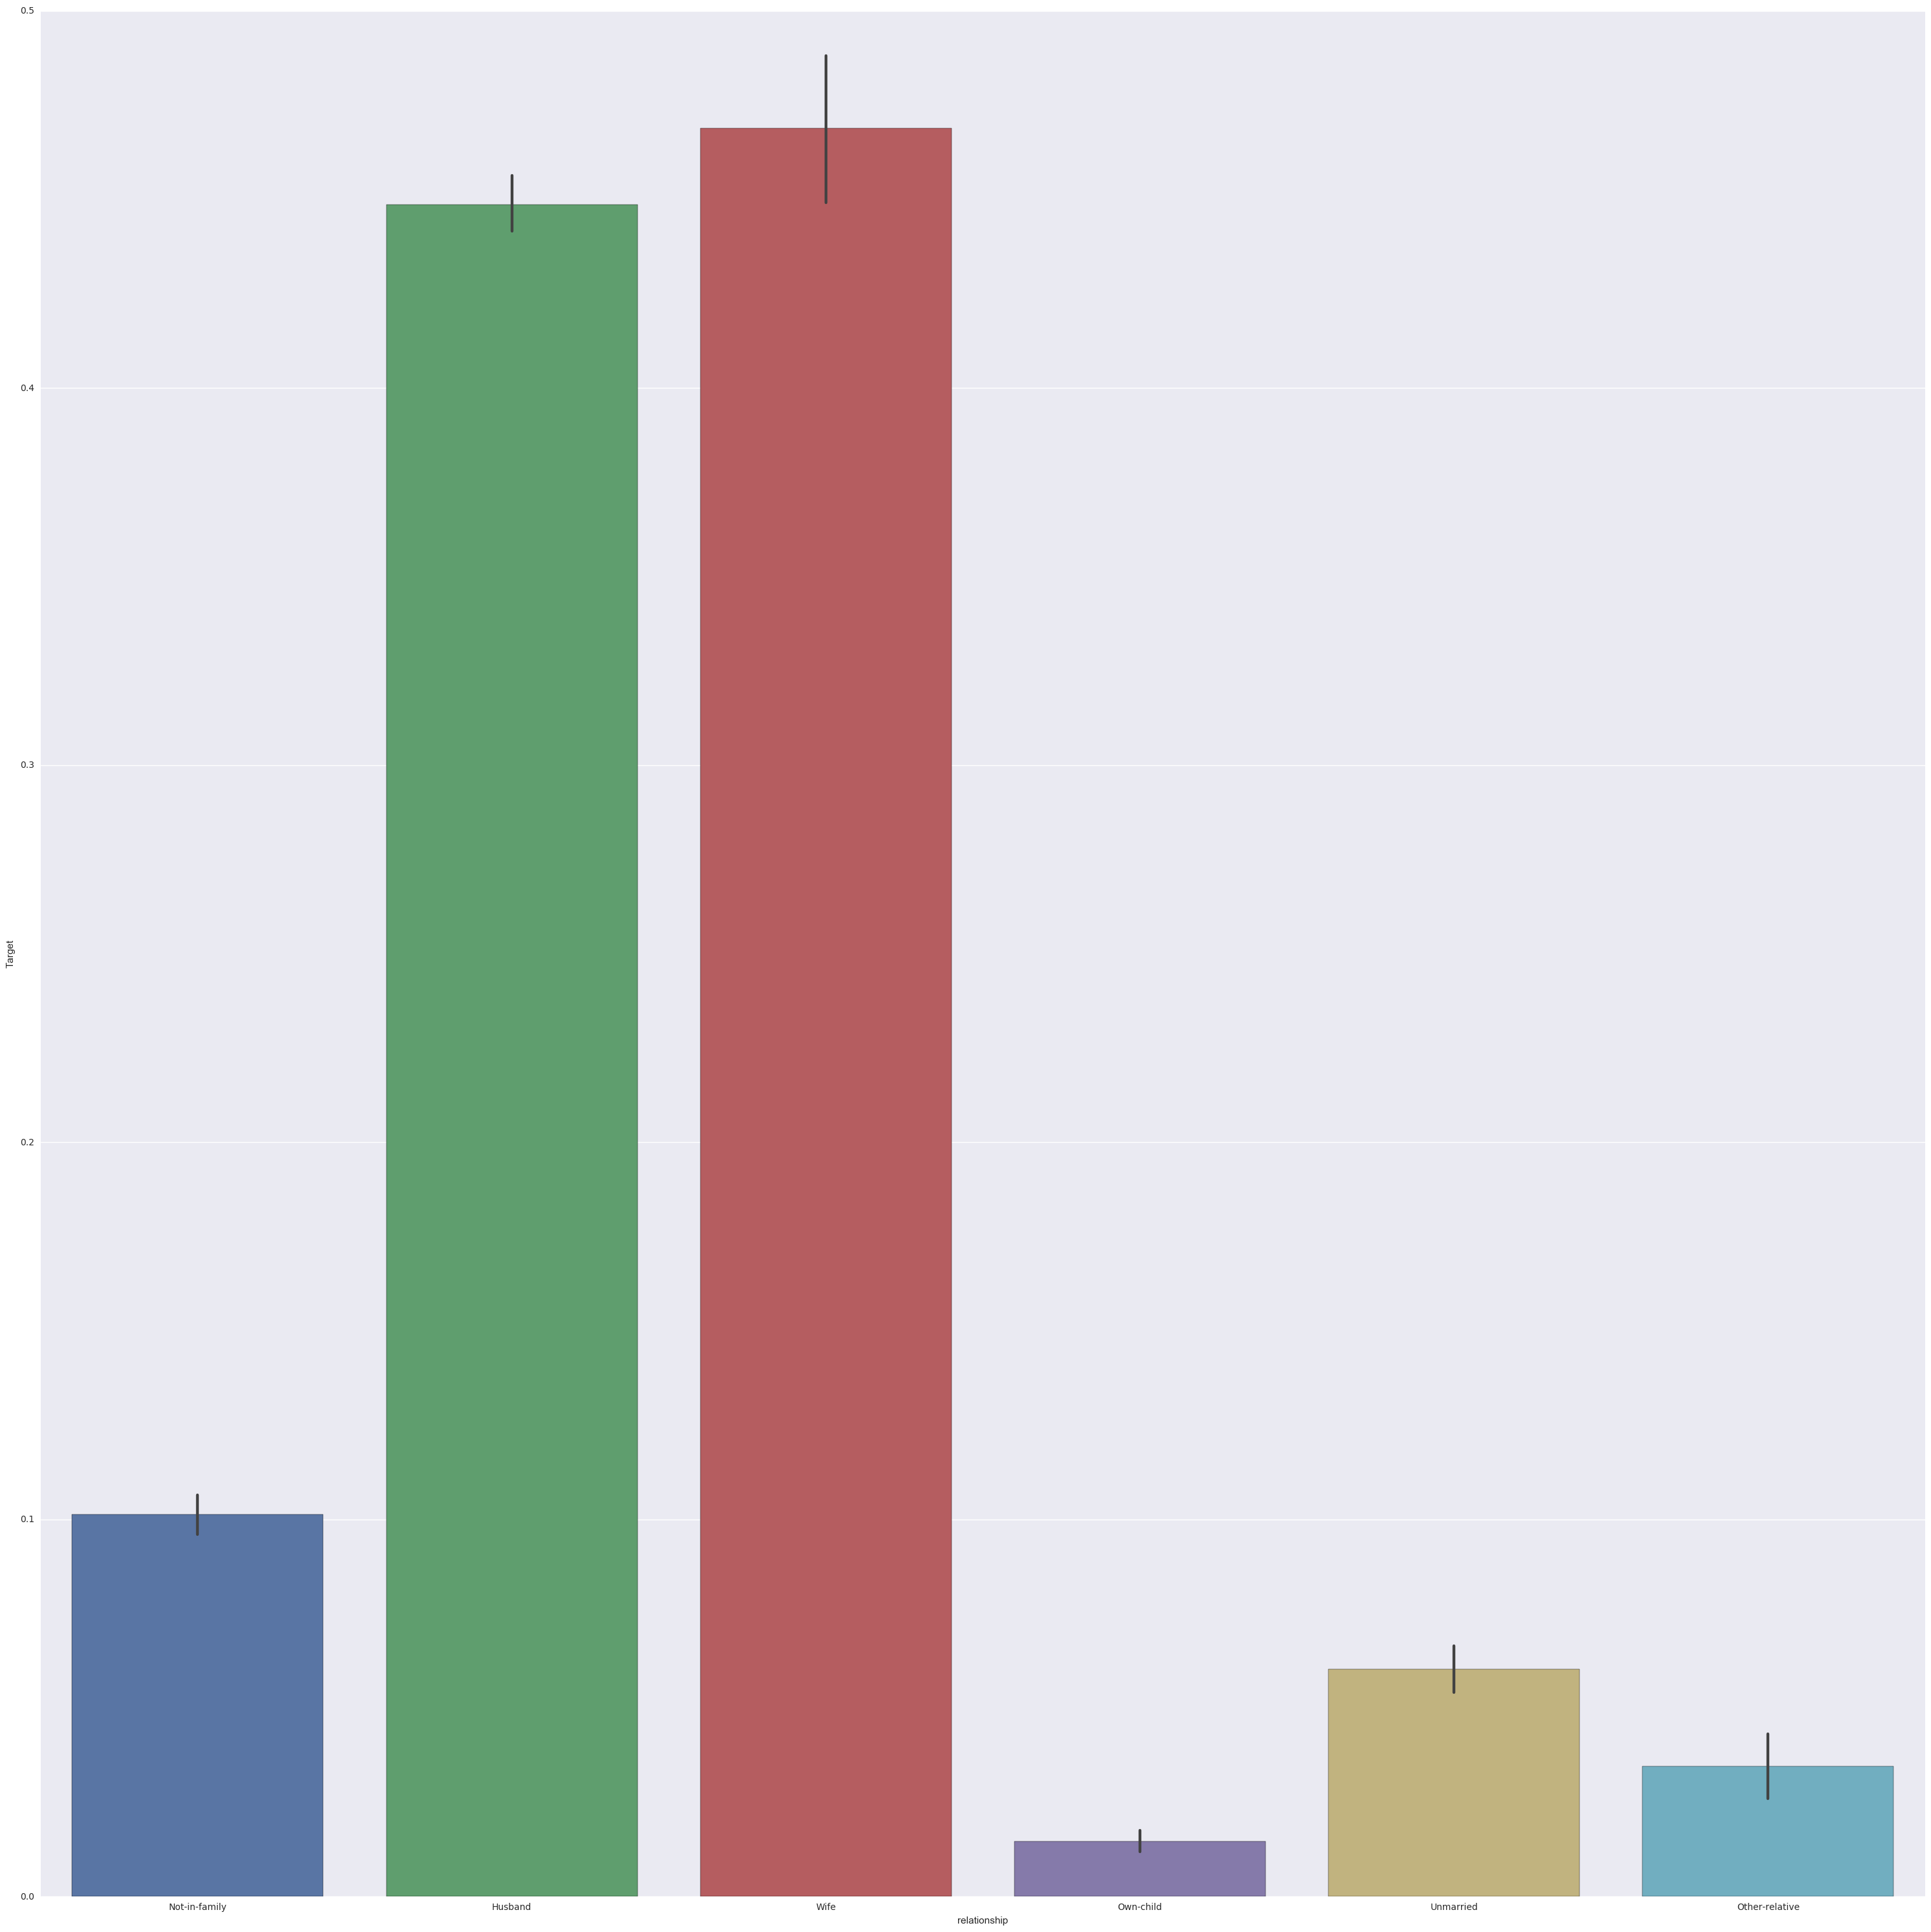

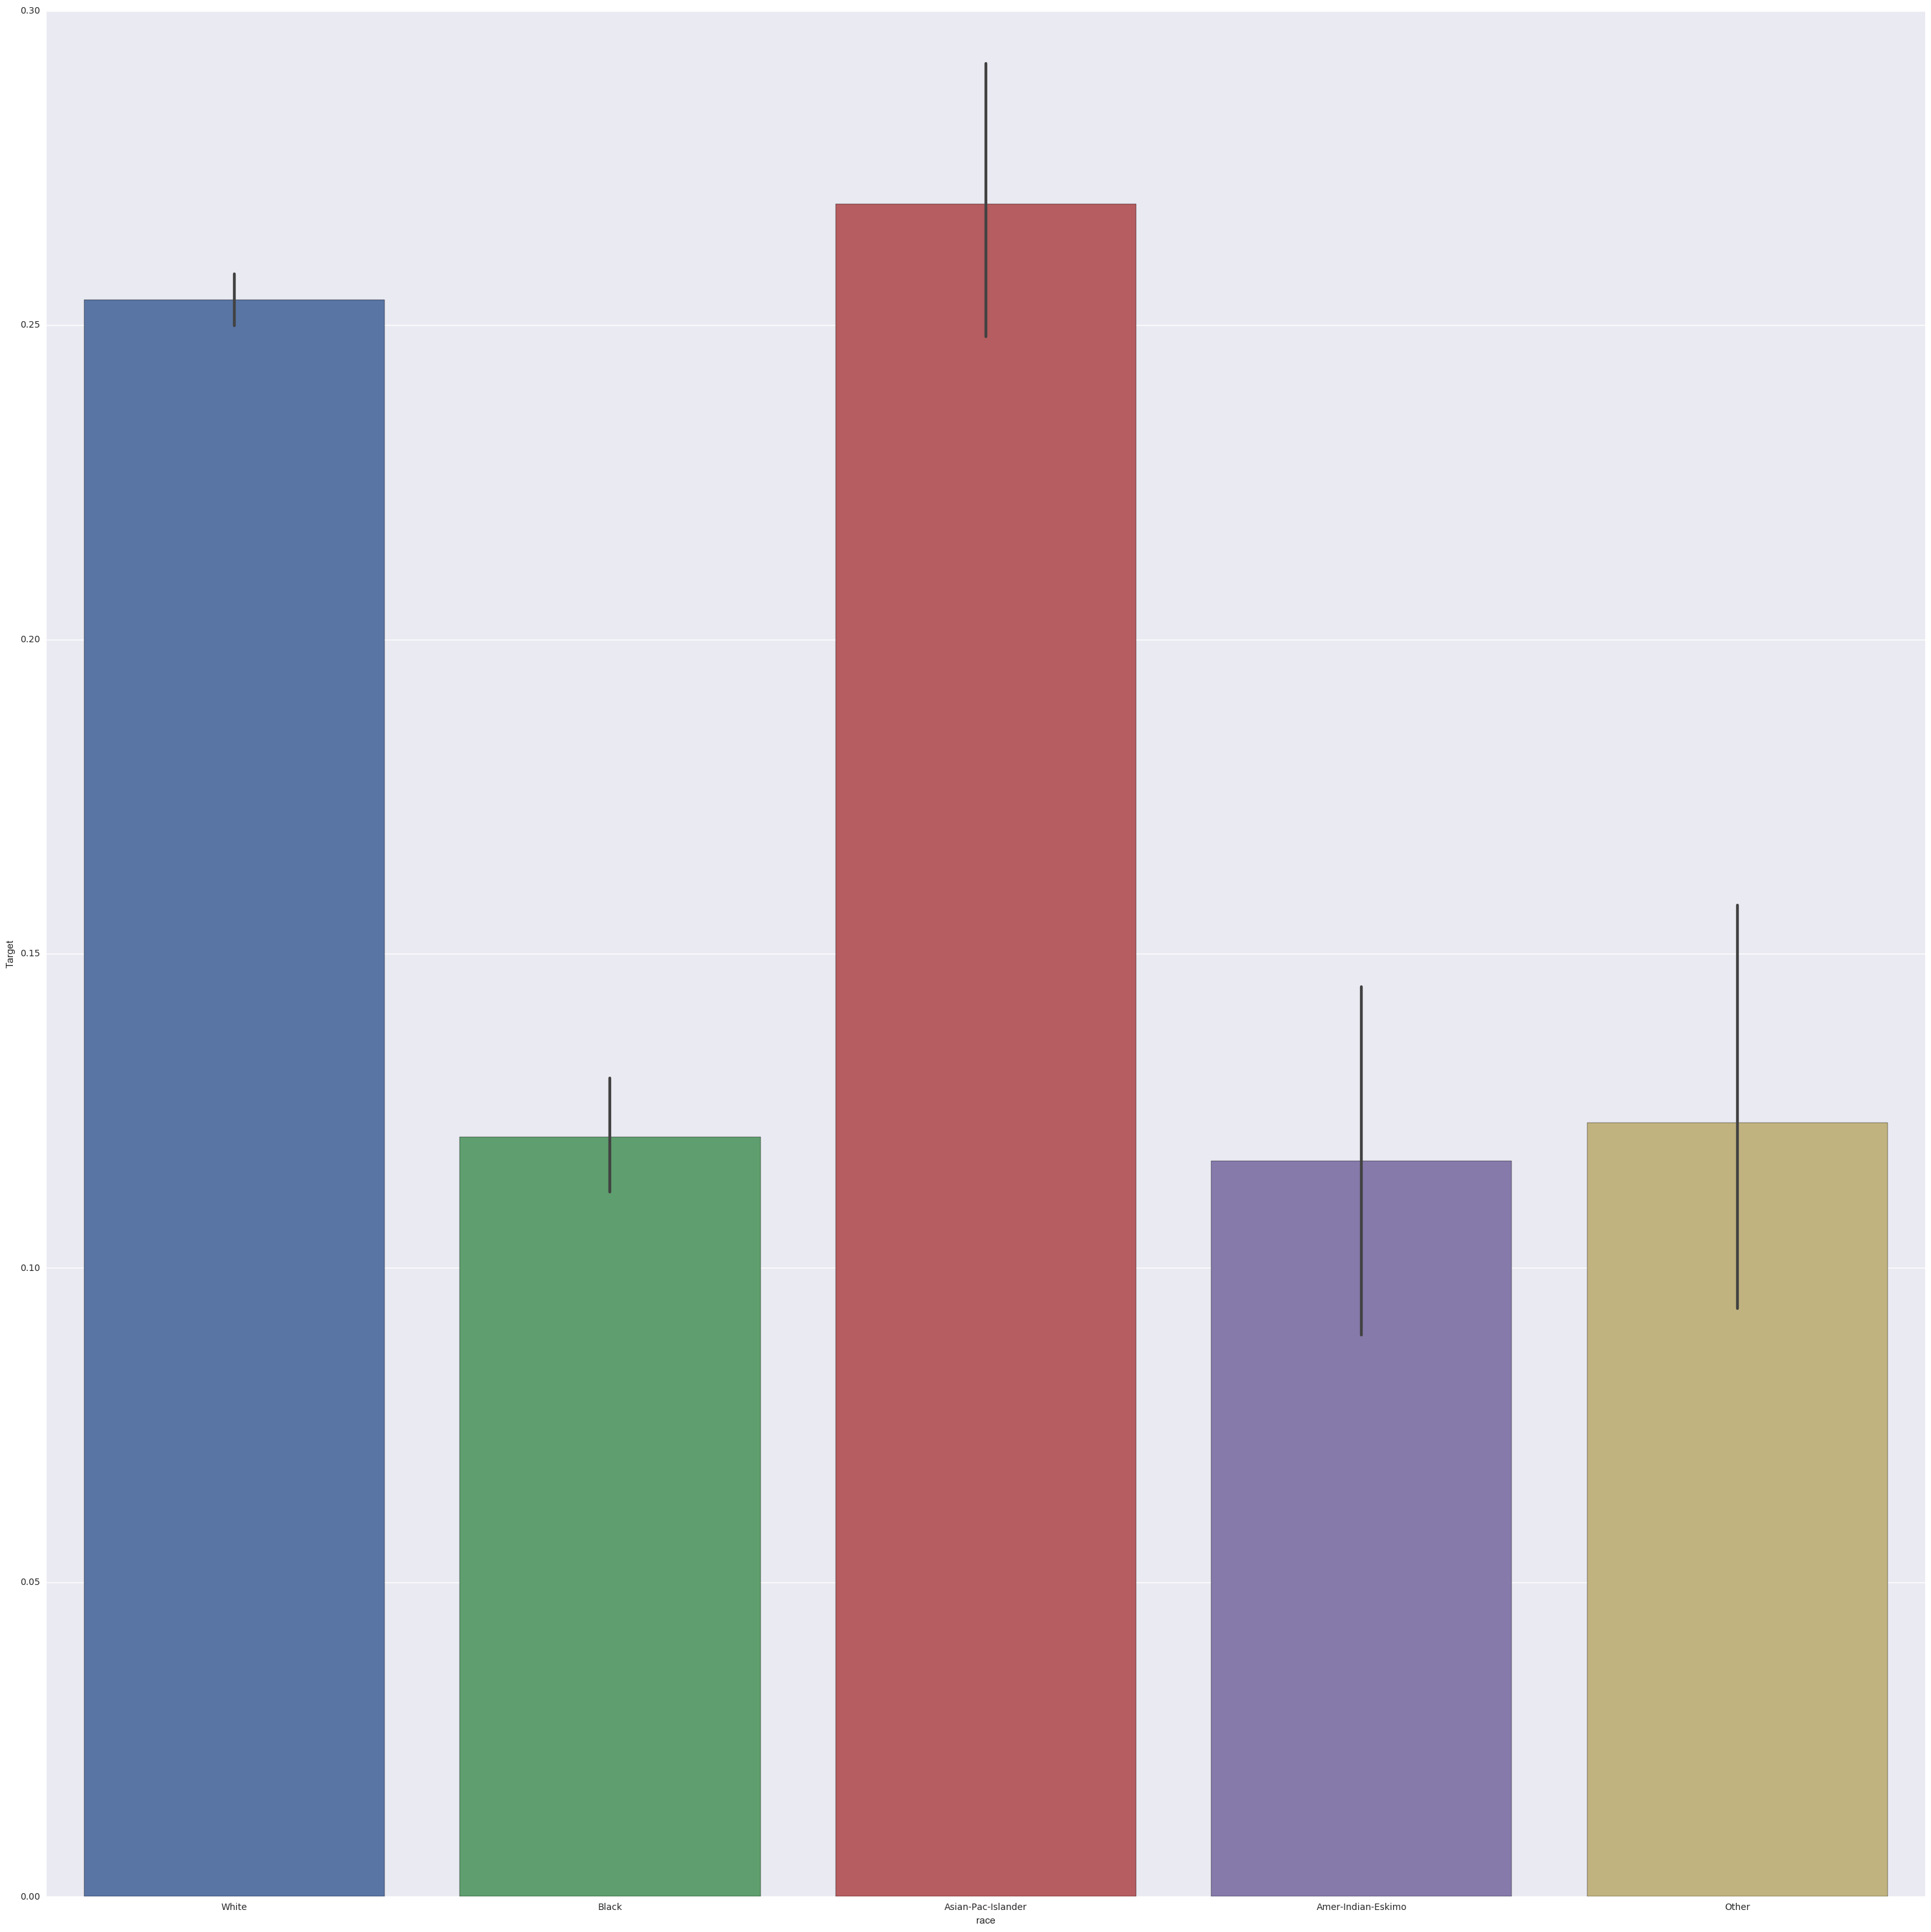

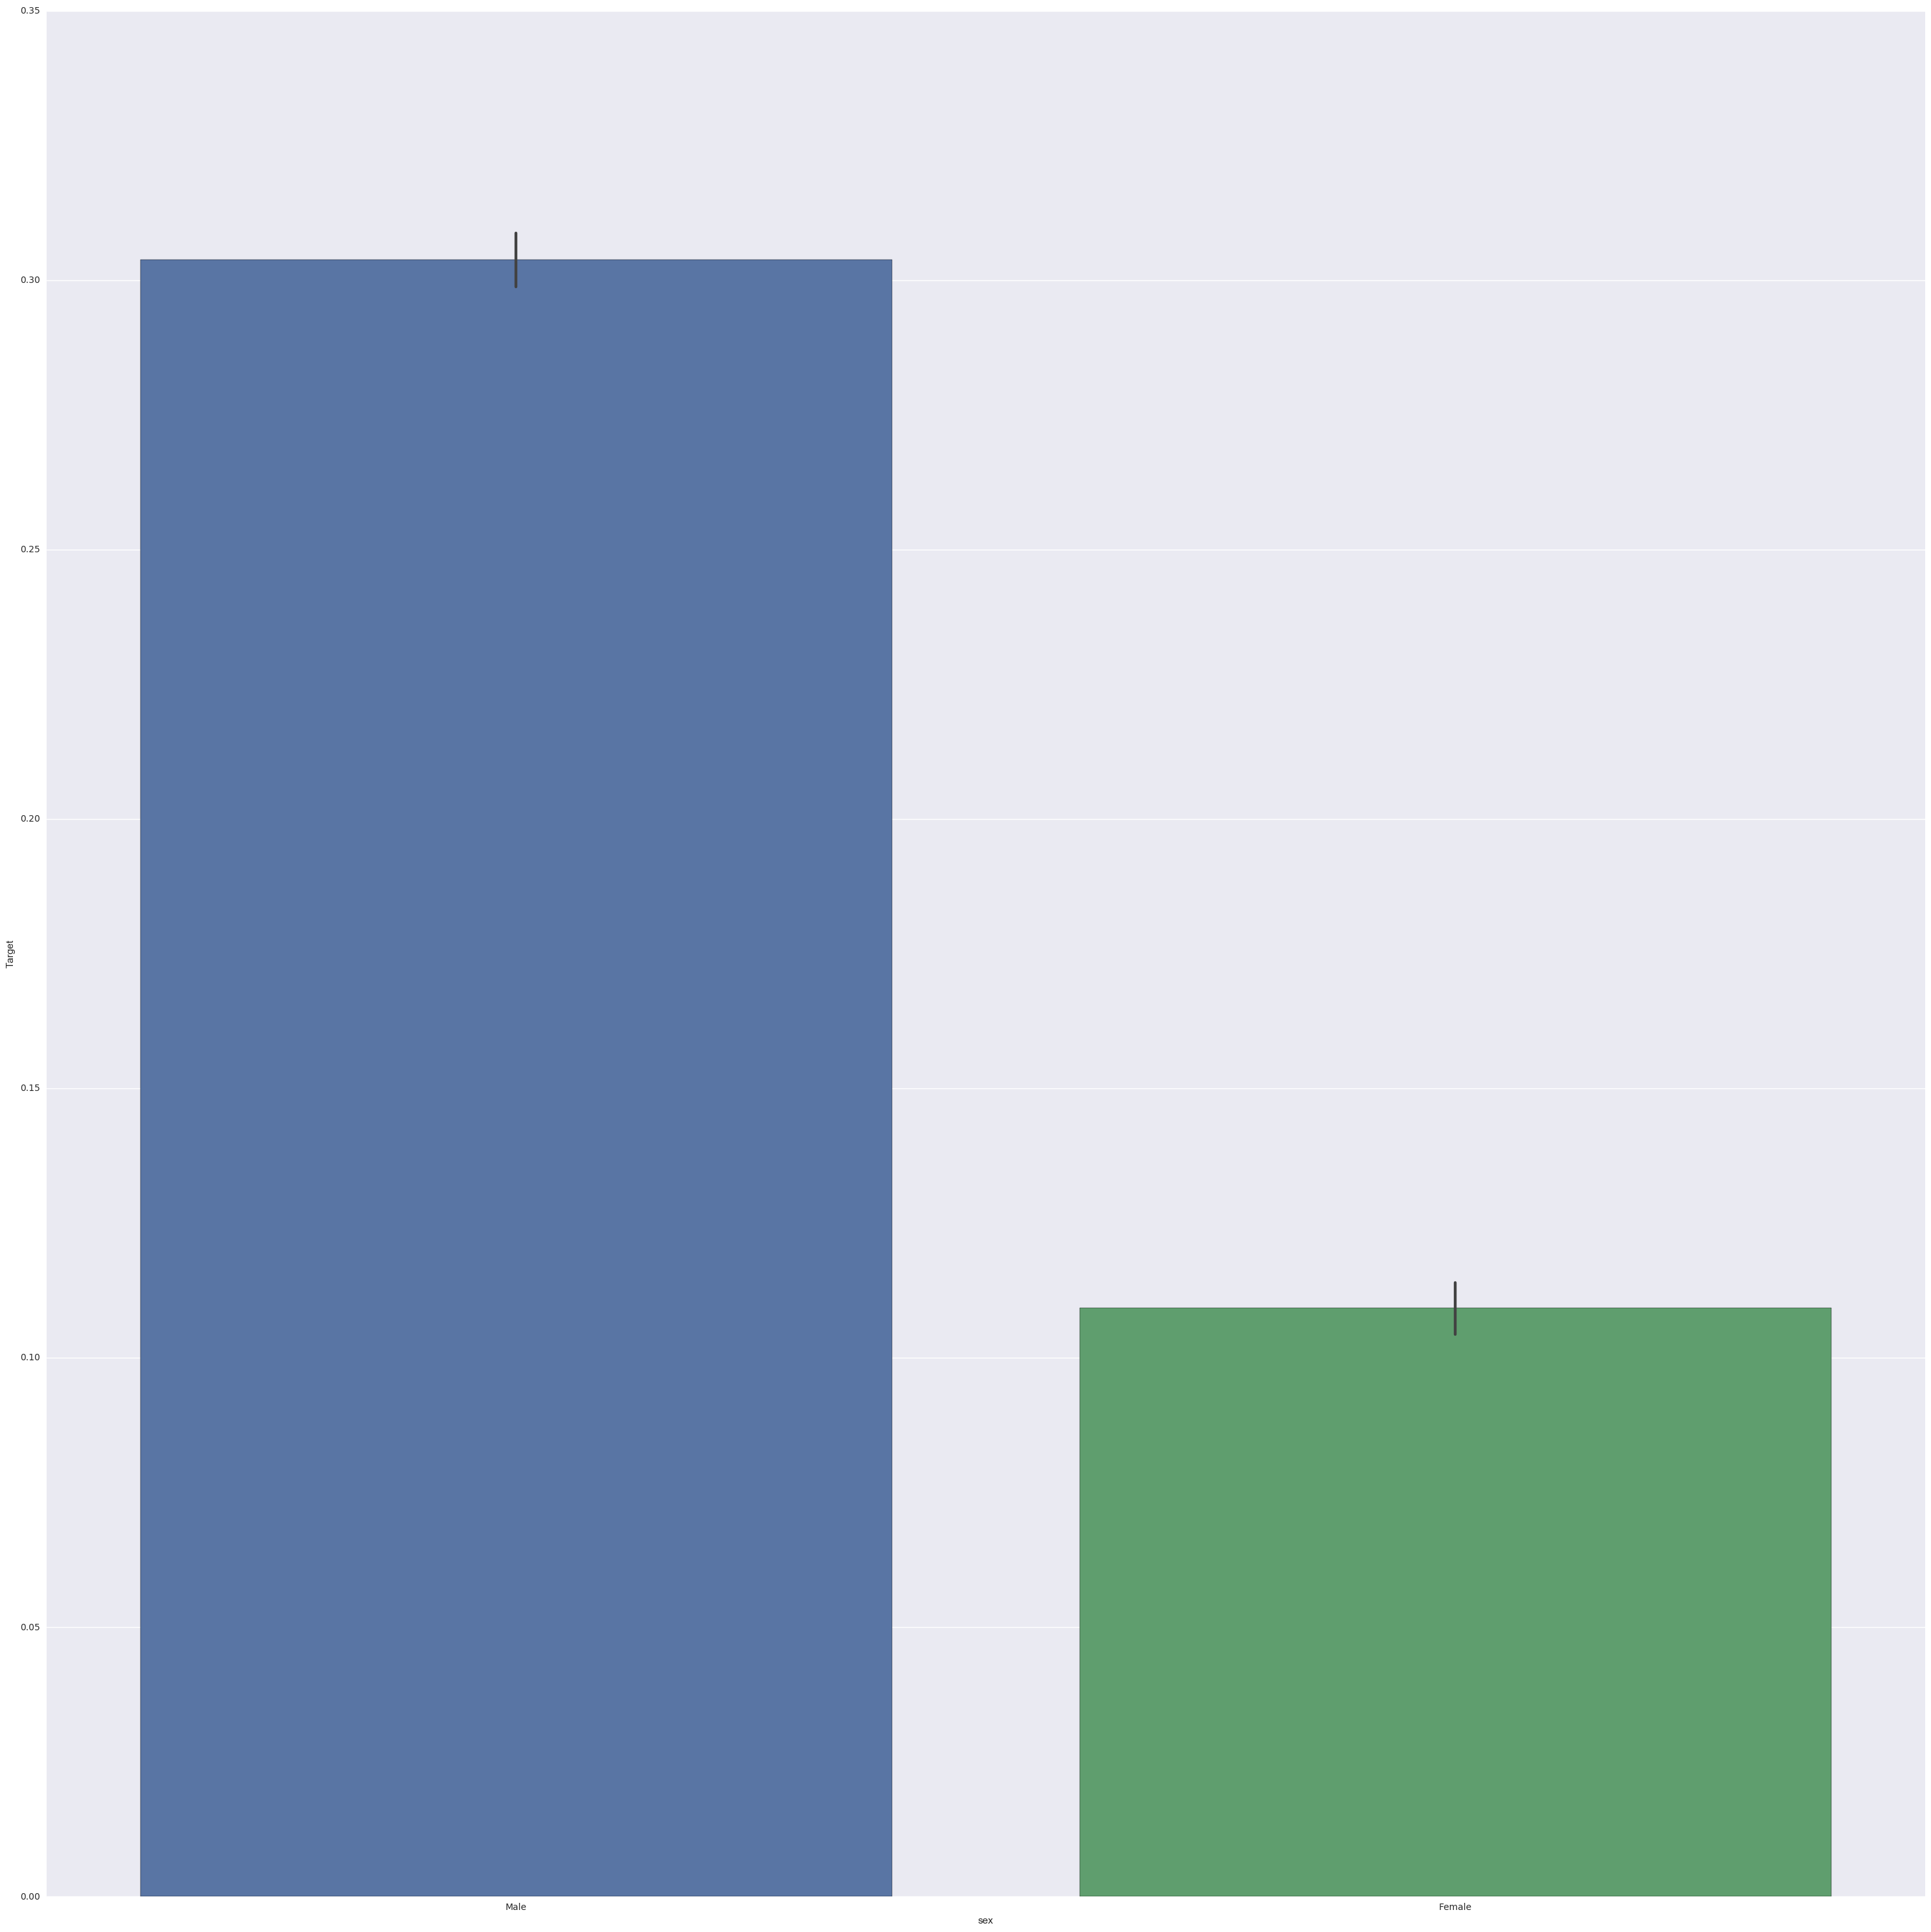

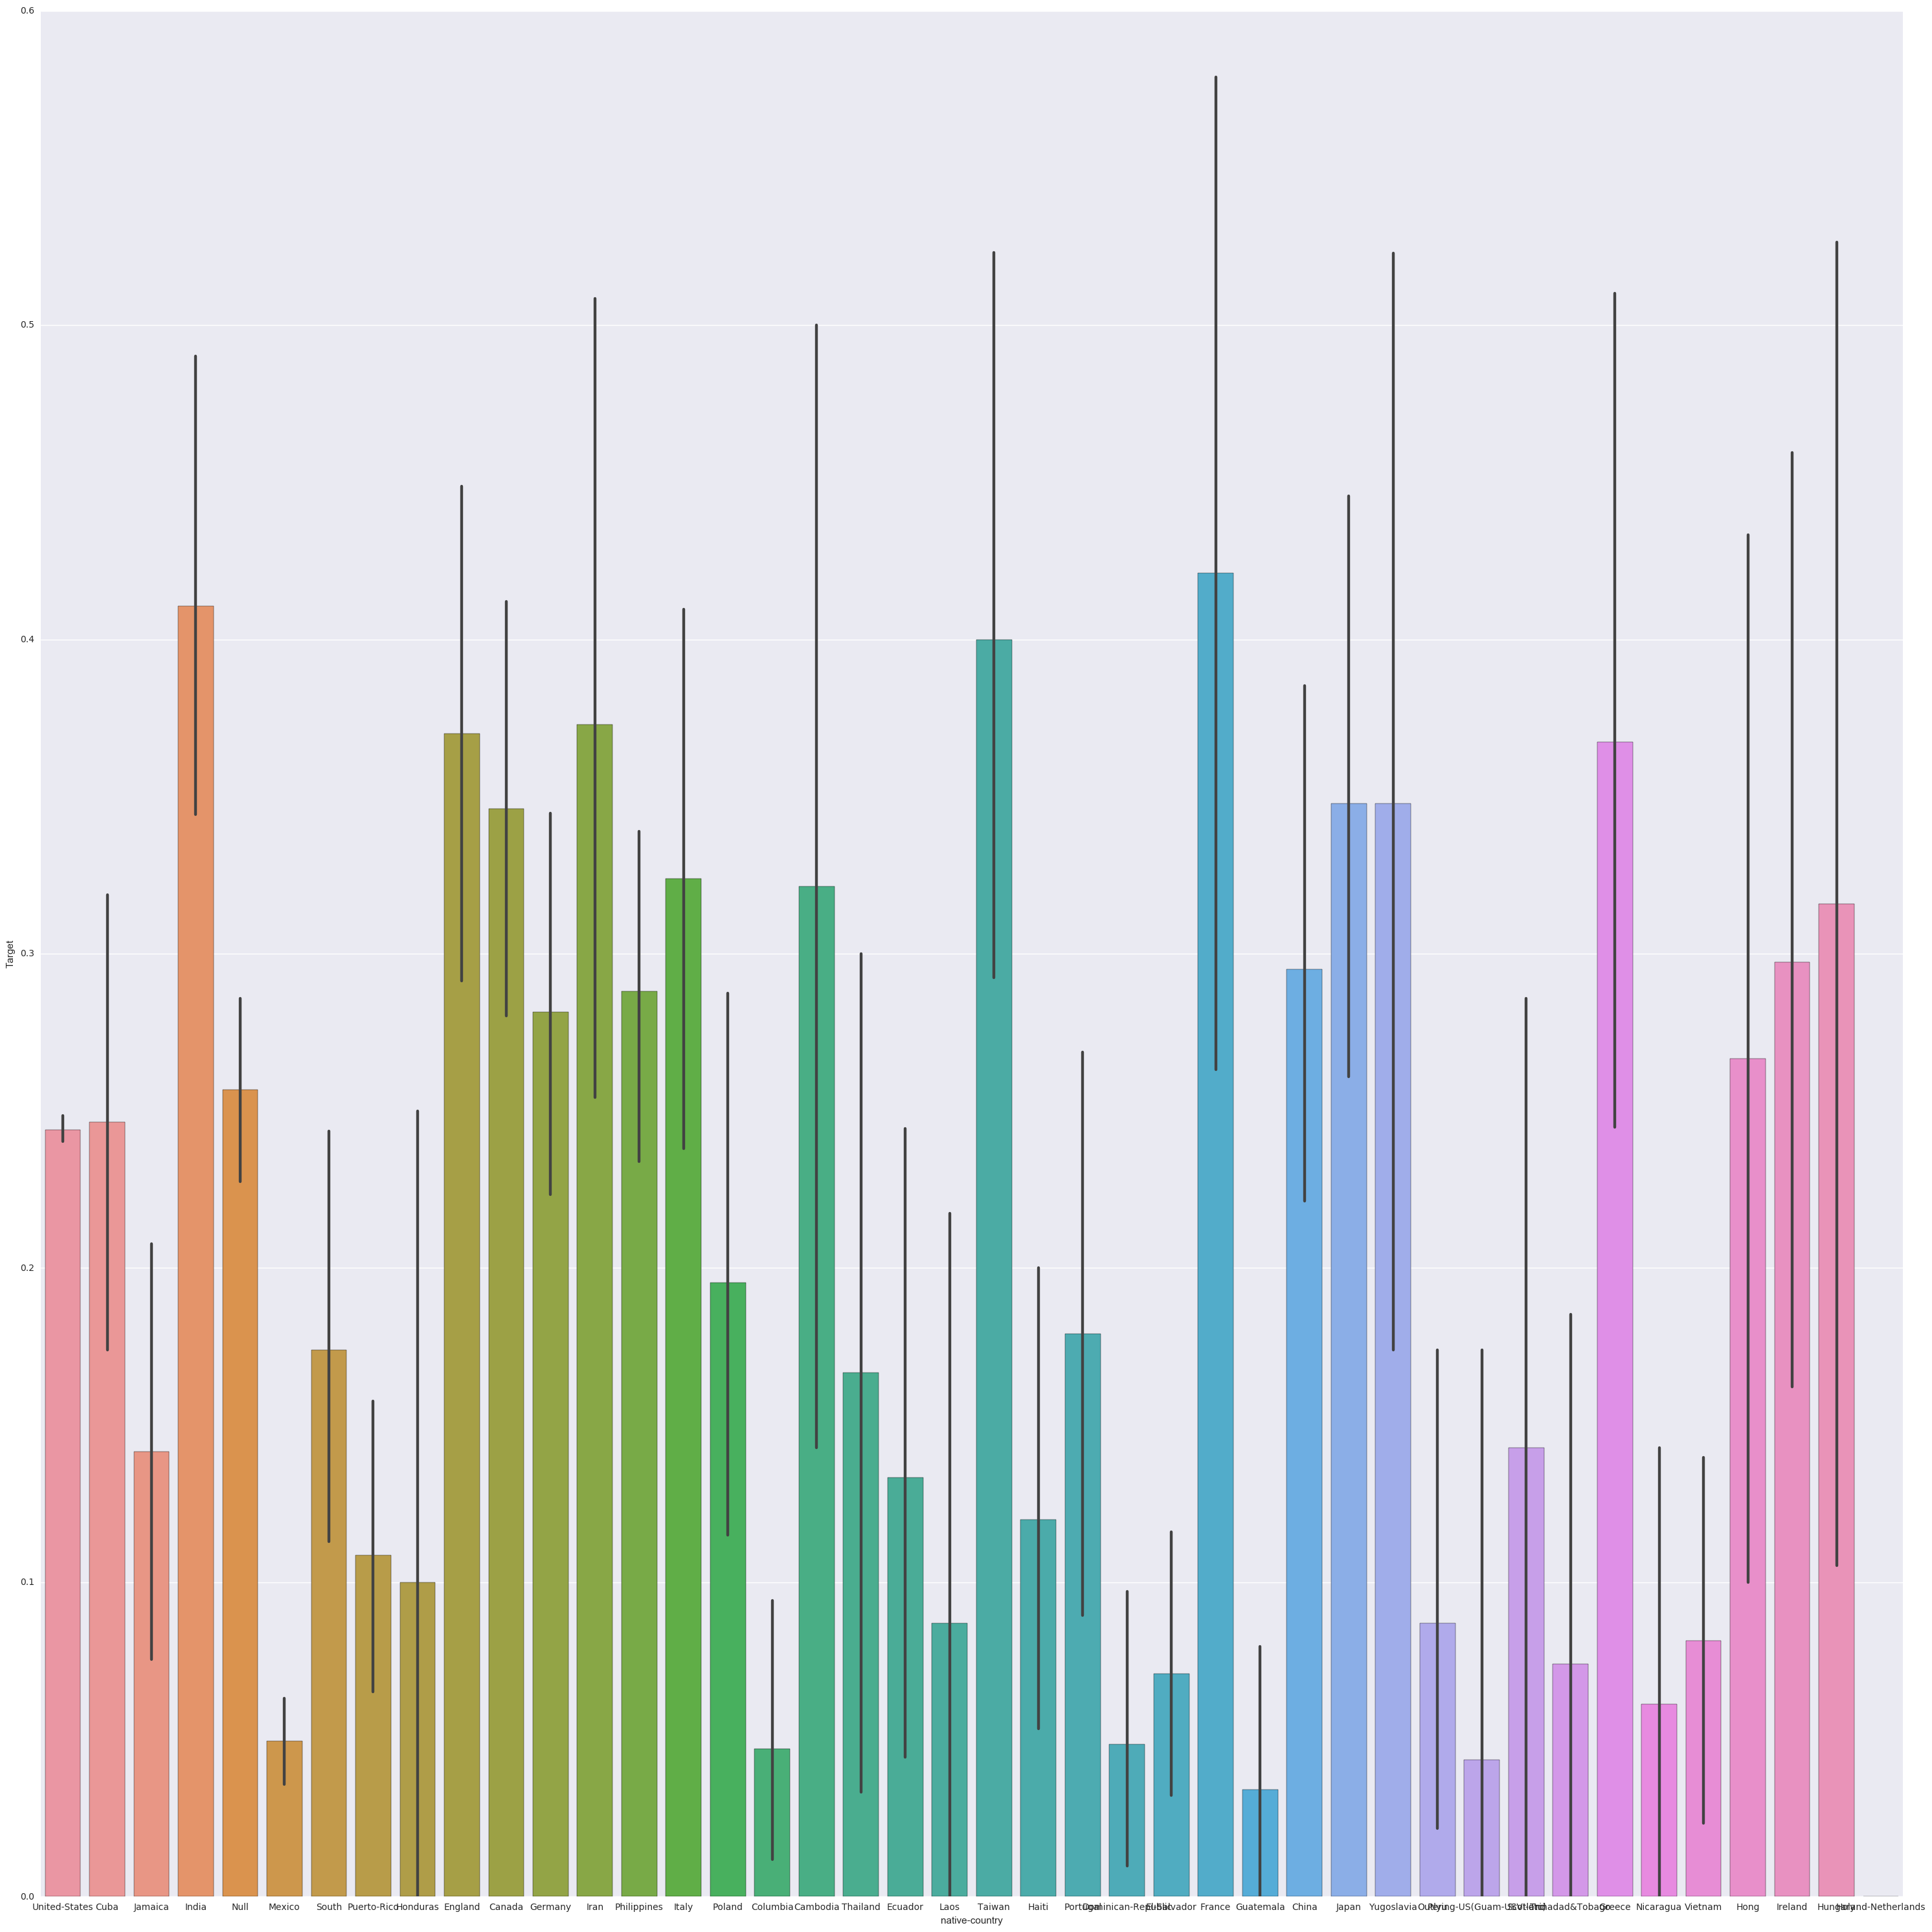

In [6]:
import seaborn as sns
import numpy as np

categories = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

for a in categories:    
    sns.factorplot(data=df_demo, x=a, y='Target', kind='bar', size = (30))
    plt.show()


### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

Greater than $50K - education-num


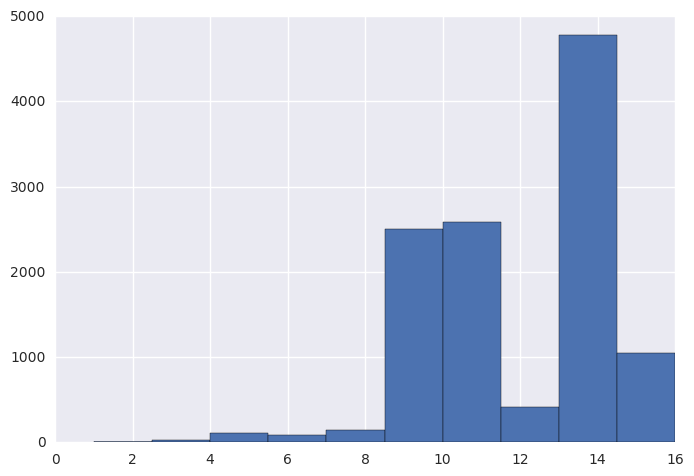

Less than $50K - education-num


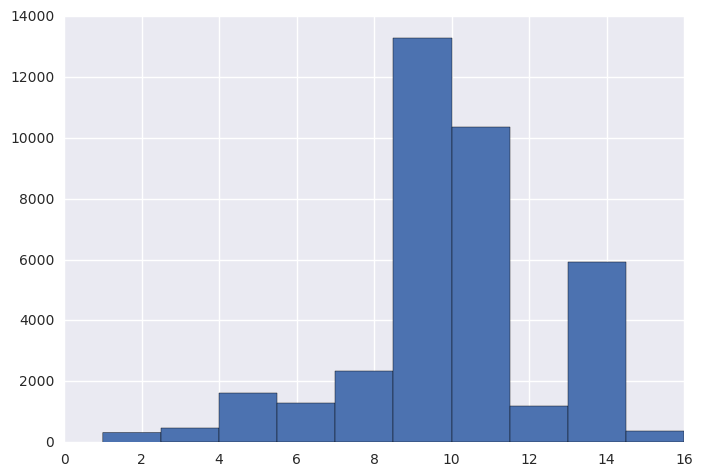

In [7]:
print "Greater than $50K - education-num"
df_demo[df_demo.Target == True]['education-num'].hist()
plt.show()

print "Less than $50K - education-num"
df_demo[df_demo.Target == False]['education-num'].hist()
plt.show()

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [9]:
df_dummies = pd.get_dummies(df_demo)
df_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
0,39,77516,13,2174,0,40,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [10]:
from sklearn import preprocessing

num_columns = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]

scaler = preprocessing.StandardScaler().fit(df_dummies[num_columns])

df_dummies[num_columns] = scaler.transform(df_dummies[num_columns])

df_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [11]:
X = df_dummies_2 = df_dummies.drop(['salary_>50K', 'salary_<=50K', 'Target'], axis=1)

y = df_dummies['Target']

print 'Benchmark is: ', sum(df_dummies['Target']) / float(len(df_dummies))

Benchmark is:  0.239281765693


## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/work/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV


model = LogisticRegression()
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(model, {'penalty':penalties, 'C':C_vals}, verbose=True, cv=2, scoring='f1_macro')
gs.fit(X_train, y_train)

gs.best_params_

/Users/work/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/work/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   39.6s finished


{'C': 1.0, 'penalty': 'l2'}

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the Model
model = LogisticRegression(C=.75, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Predict Outputs
predictions = model.predict(X_test)

print model.coef_

print(classification_report(y_test, predictions))

[[ 0.34439674  0.07074843  0.71807908  2.28141404  0.26329448  0.36092327
   0.61846653  0.          0.          0.          0.16123327  0.32470515
  -0.39672854 -0.15042104  0.         -0.03385097 -0.2333419   0.          0.
   0.52541048  0.          0.         -0.26762323 -0.08497916 -0.08097304
   0.20471111 -0.06898333  0.07511932  0.          0.27180333  0.
  -0.25505422  2.12842629  1.97988919  0.         -0.61408553 -0.20268486
   0.          0.          0.          0.05653009  0.73256345 -0.9998137
  -0.62229685 -0.34717019 -0.6620269  -0.82511175 -1.46765141  0.43634827
   0.38283306  0.22230277  0.49609969 -0.08234127 -0.25148862  0.11640003
  -0.74194222 -0.80695214  0.          0.90919793 -0.42692158  0.14982818
  -0.21588332 -0.16317728  0.         -0.73902845  0.          0.32075999
   0.36220976 -0.91637791 -2.32615865  0.15945191 -0.28127685  0.
  -0.00530806  0.57167706  0.          0.23312627  0.          0.
  -0.0547688   0.          0.          0.          0.      